# Sales Data Visualizations

In [13]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
sales = pd.read_csv("C:/Users/user/Downloads/Case Study 4 - Python Visualizations Case Study/SalesData.csv")
sales

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3704,7576,Account2736,East,EMPIRE,SYRACUSE,NY,Out,Feb,3684.48,0.00,1.0,0.0,1.06,1.14
3705,4969,Account2740,Central,SOUTHERN STAR,MONTGOMERY,AL,Med,Aug,3684.48,0.00,1.0,0.0,0.96,1.11
3706,2850,Account2746,East,SYNERGY,ASHEVILLE,NC,High,Nov,5067.70,0.00,2.0,0.0,1.11,1.55
3707,1102265,Account2748,West,DIAMONDBACK,SCOTTSDALE,AZ,Out,Jan,3684.48,0.00,1.0,0.0,1.31,1.48


1. Compare Sales by region for 2016 with 2015 using bar chart

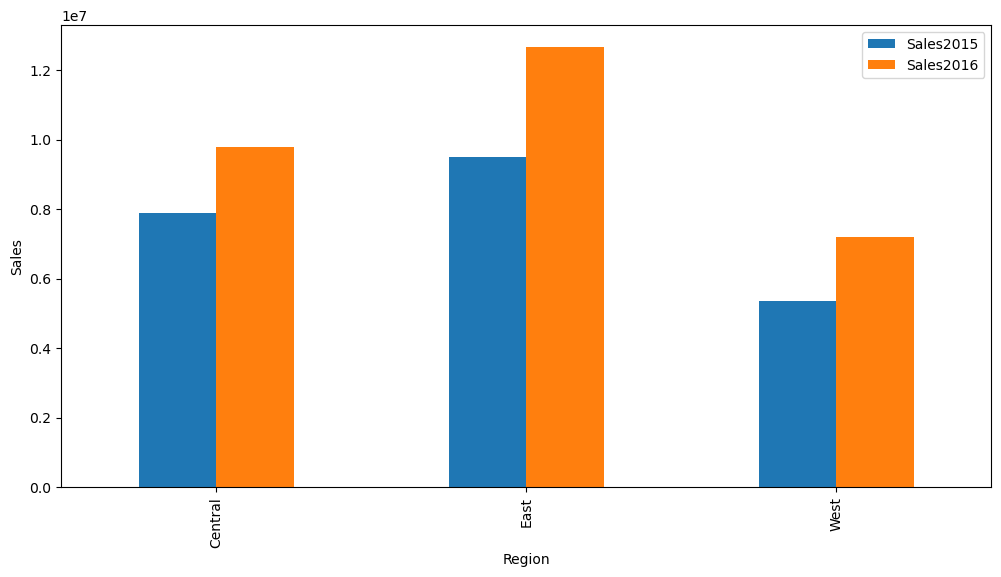

In [15]:
sales1 = sales.groupby('Region').agg({'Sales2015':'sum','Sales2016':'sum'})

sales1graph=sales1.plot(kind = 'bar',figsize=(12,6))
plt.ylabel('Sales')
plt.legend()
plt.show()

2. What are the contributing factors to the sales for each region in 2016. Visualize it using a Pie Chart.

In [16]:
sales2 = sales.groupby(['Region']).Sales2016.sum()
sales2 = sales2.reset_index()
sales2

,Region,Sales2016
0,Central,9.787809e+06
1,East,1.266723e+07
2,West,7.209689e+06


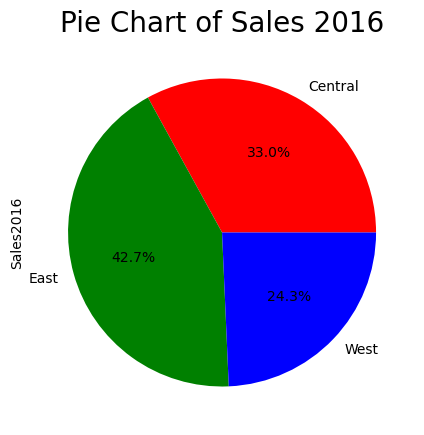

In [17]:
sales2.Sales2016.plot(kind = 'pie',figsize = (5,5),labels= ['Central','East','West'], 
            colors=['r', 'g', 'b'],
            autopct='%.1f%%') # to get percentage and round off appropriately)
plt.title('Pie Chart of Sales 2016',fontsize=20)

# Display the pie chart
plt.show()

3. Compare the total sales of 2015 and 2016 with respect to Region and Tiers

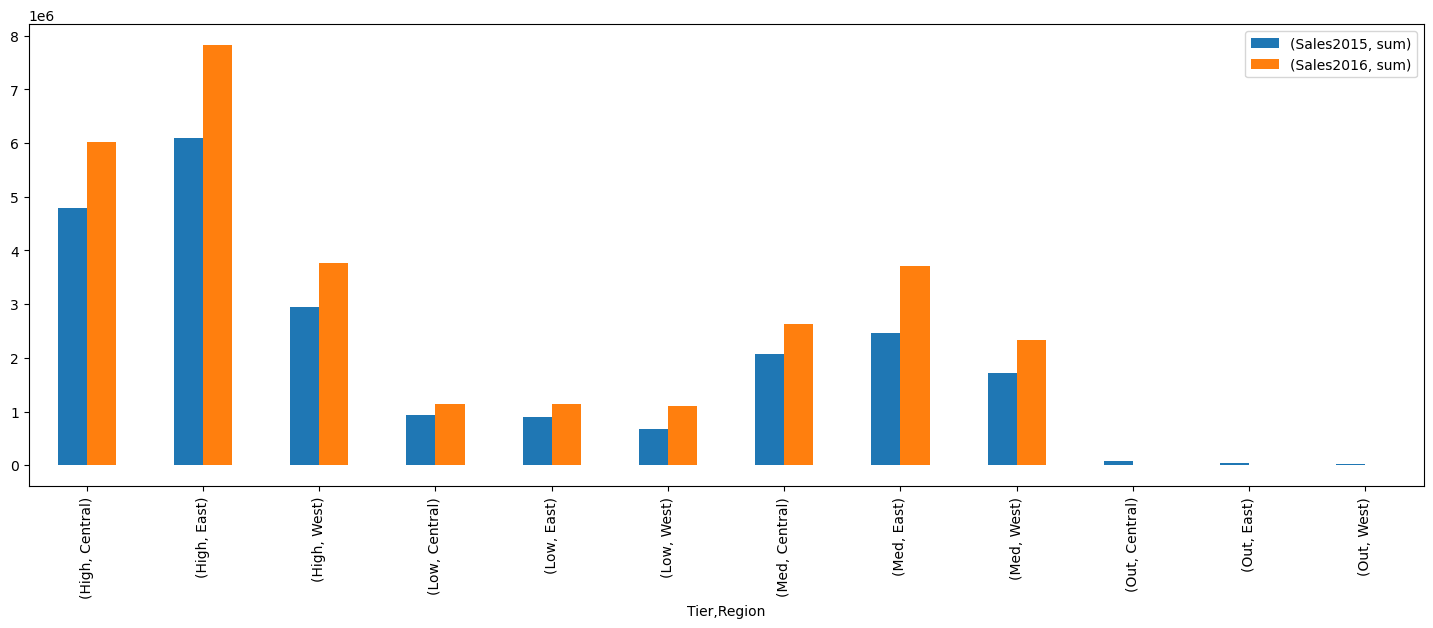

In [18]:
sales3 = sales.groupby(['Tier','Region']).aggregate({'Sales2015':['sum'],'Sales2016':['sum']})

sales3graph=sales3.plot.bar(figsize=(18,6))
plt.legend()
plt.show()

4. In East region, which state registered a decline in 2016 as compared to 2015?

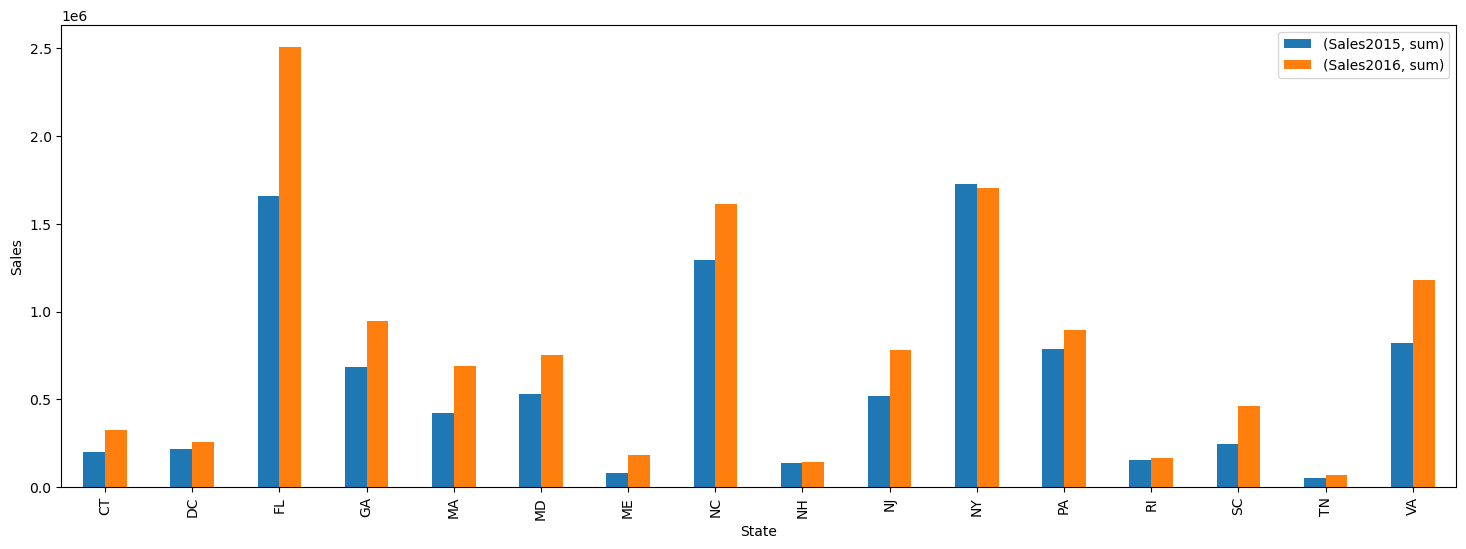

In [19]:
s = sales.loc[(sales.Region == 'East')]
sales4 = s.groupby(['State']).aggregate({'Sales2015':['sum'],'Sales2016':['sum']})

sales4graph=sales4.plot.bar(figsize=(18,6))
plt.legend()
plt.ylabel('Sales')
plt.show()

In East region, NY registered a decline in sales in 2016

5. In all the High tier, which Division saw a decline in number of units sold in 2016 compared to 2015?

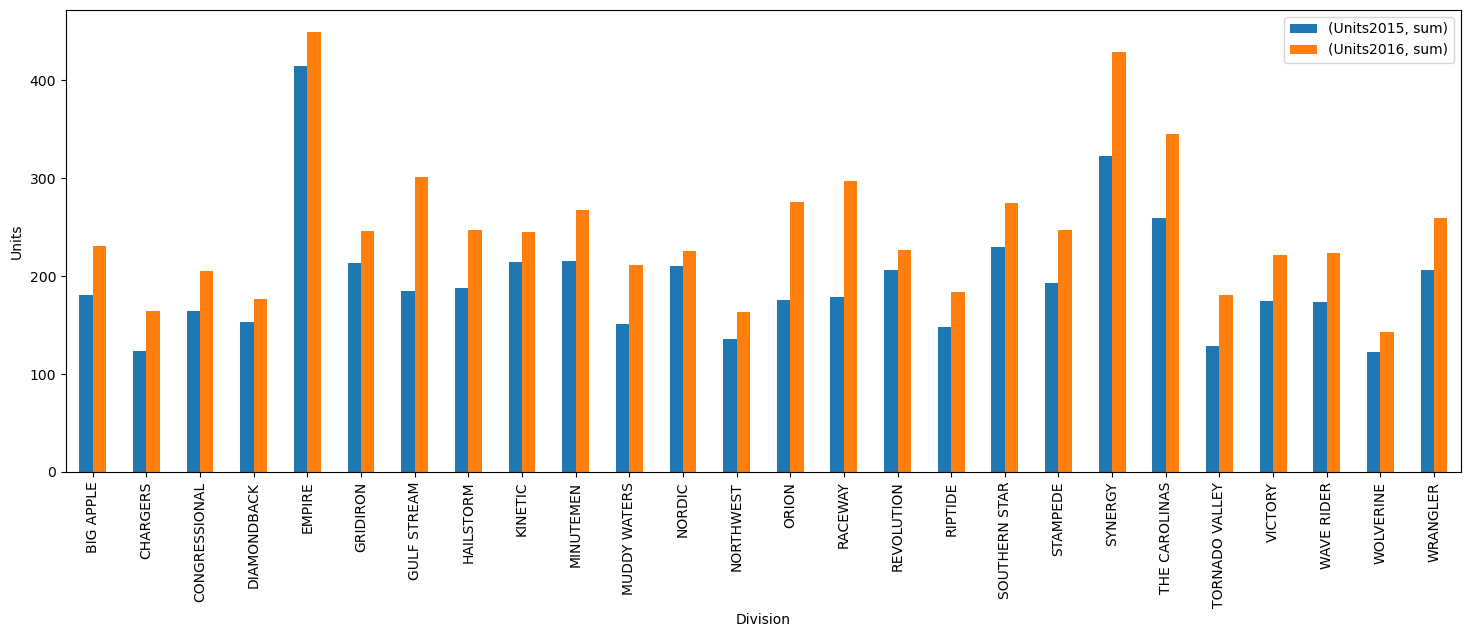

In [20]:
s1 = sales.loc[(sales.Tier == 'High')]
sales4 = s1.groupby(['Division']).aggregate({'Units2015':['sum'],'Units2016':['sum']})

sales4graph=sales4.plot.bar(figsize=(18,6))
plt.legend()
plt.ylabel('Units')
plt.show()

No division saw a decline in number of units sold in 2016 compared to 2015.

6. Create a new column Qtr using numpy.where() or any suitable utility in the imported dataset. The Quarters are based on months and defined as -
• Jan - Mar : Q1
• Apr - Jun : Q2
• Jul - Sep : Q3
• Oct - Dec : Q4

In [21]:
#Categorizing
sales.loc[(sales.Month == 'Jan') | (sales.Month == 'Feb') | (sales.Month == 'Mar'),'Qtr'] = 'Q1'
sales.loc[(sales.Month == 'Apr') | (sales.Month == 'May') | (sales.Month == 'Jun'),'Qtr'] = 'Q2'
sales.loc[(sales.Month == 'Jul') | (sales.Month == 'Aug') | (sales.Month == 'Sep'),'Qtr'] = 'Q3'
sales.loc[(sales.Month == 'Oct') | (sales.Month == 'Nov') | (sales.Month == 'Dec'),'Qtr'] = 'Q4'
# New column has been added to the sales data - 'Qtr'
sales

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016,Qtr
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53,Q3
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31,Q4
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29,Q2
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17,Q1
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53,Q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3704,7576,Account2736,East,EMPIRE,SYRACUSE,NY,Out,Feb,3684.48,0.00,1.0,0.0,1.06,1.14,Q1
3705,4969,Account2740,Central,SOUTHERN STAR,MONTGOMERY,AL,Med,Aug,3684.48,0.00,1.0,0.0,0.96,1.11,Q3
3706,2850,Account2746,East,SYNERGY,ASHEVILLE,NC,High,Nov,5067.70,0.00,2.0,0.0,1.11,1.55,Q4
3707,1102265,Account2748,West,DIAMONDBACK,SCOTTSDALE,AZ,Out,Jan,3684.48,0.00,1.0,0.0,1.31,1.48,Q1


7. Compare Qtr wise sales in 2015 and 2016 in a bar plot

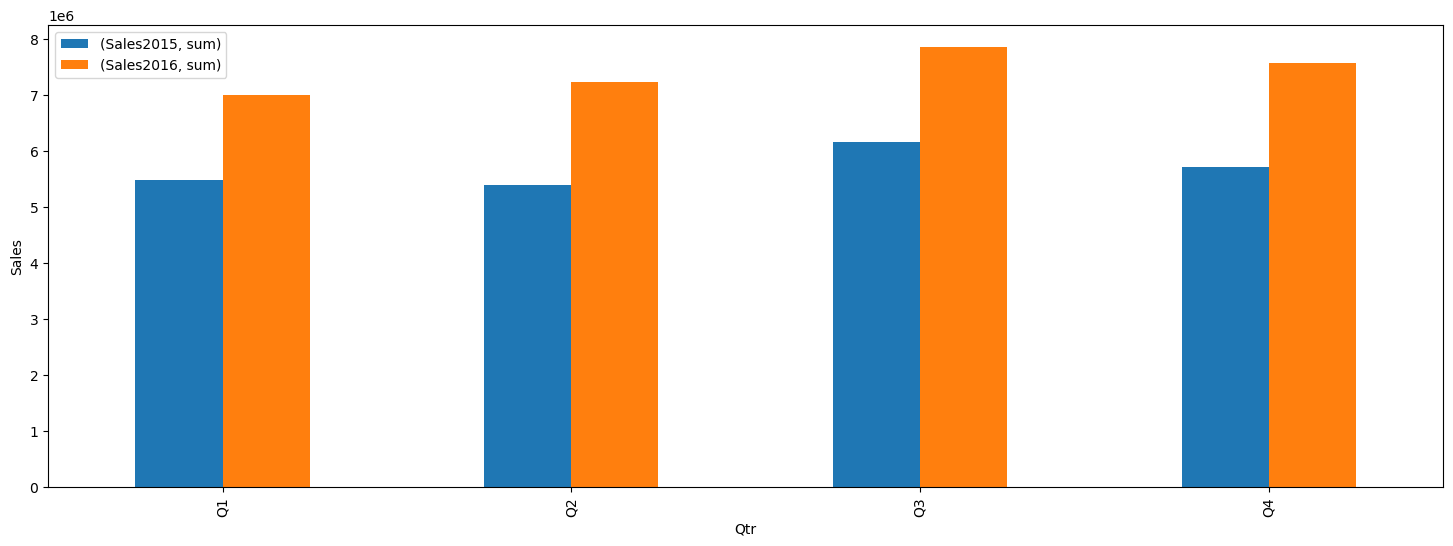

In [22]:
sales5 = sales.groupby(['Qtr']).aggregate({'Sales2015':['sum'],'Sales2016':['sum']})

sales5graph=sales5.plot.bar(figsize=(18,6))
plt.legend()
plt.ylabel('Sales')
plt.show()

8. Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a pie chart.

In [ ]:
total_sales = sales.pivot_table(index ='Tier',columns ='Qtr',values ='Sales2016', aggfunc = 'sum')
total_sales

total_sales.plot(kind='pie', 
            colors=['r', 'g', 'b'],
            legend = False,
            autopct='%.1f%%', # to get percentage and round off appropriately
            subplots= True)

plt.title('Composition of Quarterly Sales in 2016 by Tier')

# Display the pie chart
plt.show()